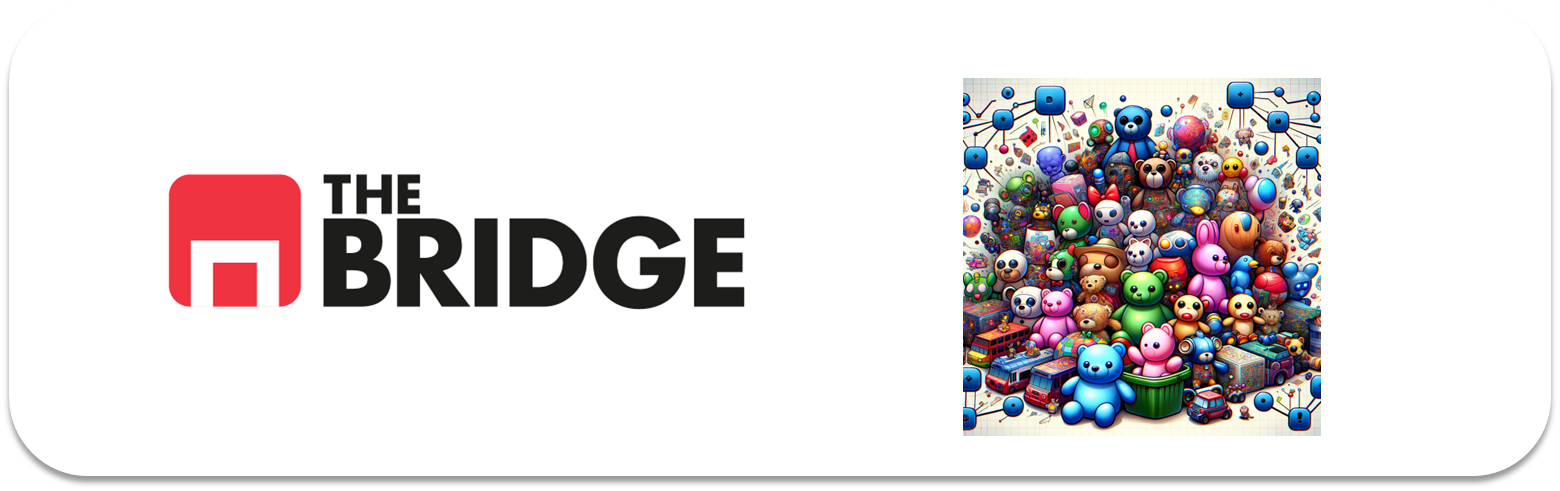

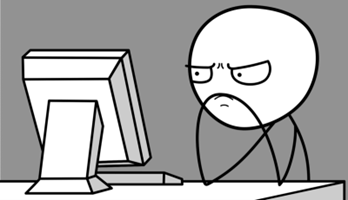

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [7]:
# Cargaremos según necesitemos para mi mejor comprensión
import matplotlib.pyplot as plt


## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Cargar el dataset
faces = fetch_olivetti_faces()

# Mostrar la descripción del dataset
print(faces['DESCR'])

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ferna\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for s

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [2]:
import pandas as pd
import numpy as np


# Mostrar el target
target = faces.target
print("Target:", target[:10])  # Mostrar los primeros 10 valores del target

# Crear un DataFrame con los datos y el target
df = pd.DataFrame(data=faces.data)
df['target'] = target

# Reordenar aleatoriamente el DataFrame
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame original y del DataFrame reordenado
print("Original DataFrame:")
print(df.head())
print("\nShuffled DataFrame:")
print(df_shuffled.head())

Target: [0 0 0 0 0 0 0 0 0 0]
Original DataFrame:
          0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [3]:
from sklearn.model_selection import train_test_split

# Primero, dividir en conjunto de entrenamiento (80%) y conjunto de validación + prueba (20%)
train_data, val_test_data = train_test_split(df_shuffled, test_size=0.2, stratify=df_shuffled['target'], random_state=42)

# Luego, dividir el conjunto de validación + prueba en conjunto de validación (10%) y conjunto de prueba (10%)
val_data, test_data = train_test_split(val_test_data, test_size=0.5, stratify=val_test_data['target'], random_state=42)

# Mostrar el tamaño de cada conjunto
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")


Train data size: 320
Validation data size: 40
Test data size: 40


### #1.4

Crea los pares X,y para train, validation y test.

Para crear los pares X e y para los conjuntos de entrenamiento, validación y prueba, seguiremos los siguientes pasos:

Separar las características (X) y las etiquetas (y) en cada conjunto de datos.
Normalizar las características (X) dividiendo por 255.0 para que los valores estén en el rango [0, 1].

In [5]:
# Separar características y etiquetas para cada conjunto de datos
X_train = train_data.drop('target', axis=1) / 255.0
y_train = train_data['target']

X_val = val_data.drop('target', axis=1) / 255.0
y_val = val_data['target']

X_test = test_data.drop('target', axis=1) / 255.0
y_test = test_data['target']

# Verificar las formas de los conjuntos de datos
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (320, 4096), y_train shape: (320,)
X_val shape: (40, 4096), y_val shape: (40,)
X_test shape: (40, 4096), y_test shape: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [6]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

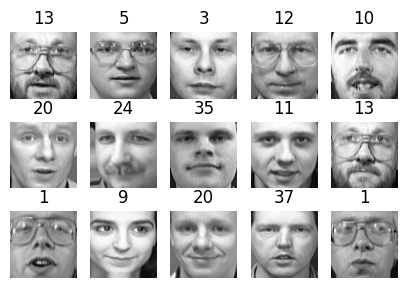

In [10]:
# Visualizar caras del conjunto de entrenamiento
plot_faces(X_train.iloc[:15], y_train.iloc[:15])


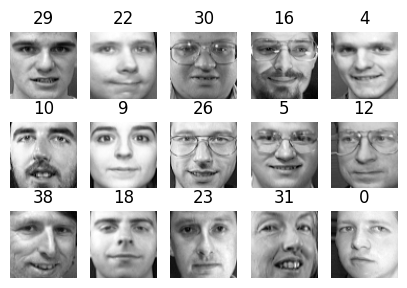

In [11]:
# Visualizar caras del conjunto de validación 
plot_faces(X_val.iloc[:15], y_val.iloc[:15])


### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

221

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Obtener el número de componentes principales
num_components = pca.n_components_

# Aplicar K-Means para encontrar el mejor k utilizando el método de la silueta
best_score = -1
best_k = 0

for k in range(5, 151, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print("El mejor k que proporciona el mejor score de silueta es:", best_k)
print("El score de silueta correspondiente es:", best_score)


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


El mejor k que proporciona el mejor score de silueta es: 150
El score de silueta correspondiente es: 0.20131615


Esto significa que, según el método de la silueta, el conjunto de datos se agrupa mejor en 150 grupos distintos.

In [18]:
# Obtener el número de componentes principales
num_components = pca.n_components_

# Aplicar K-Means para encontrar el mejor k utilizando el método de la silueta ampliando K range a 250
best_score = -1
best_k = 0

for k in range(5, 251, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print("El mejor k que proporciona el mejor score de silueta es:", best_k)
print("El score de silueta correspondiente es:", best_score)

El mejor k que proporciona el mejor score de silueta es: 150
El score de silueta correspondiente es: 0.20131615


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

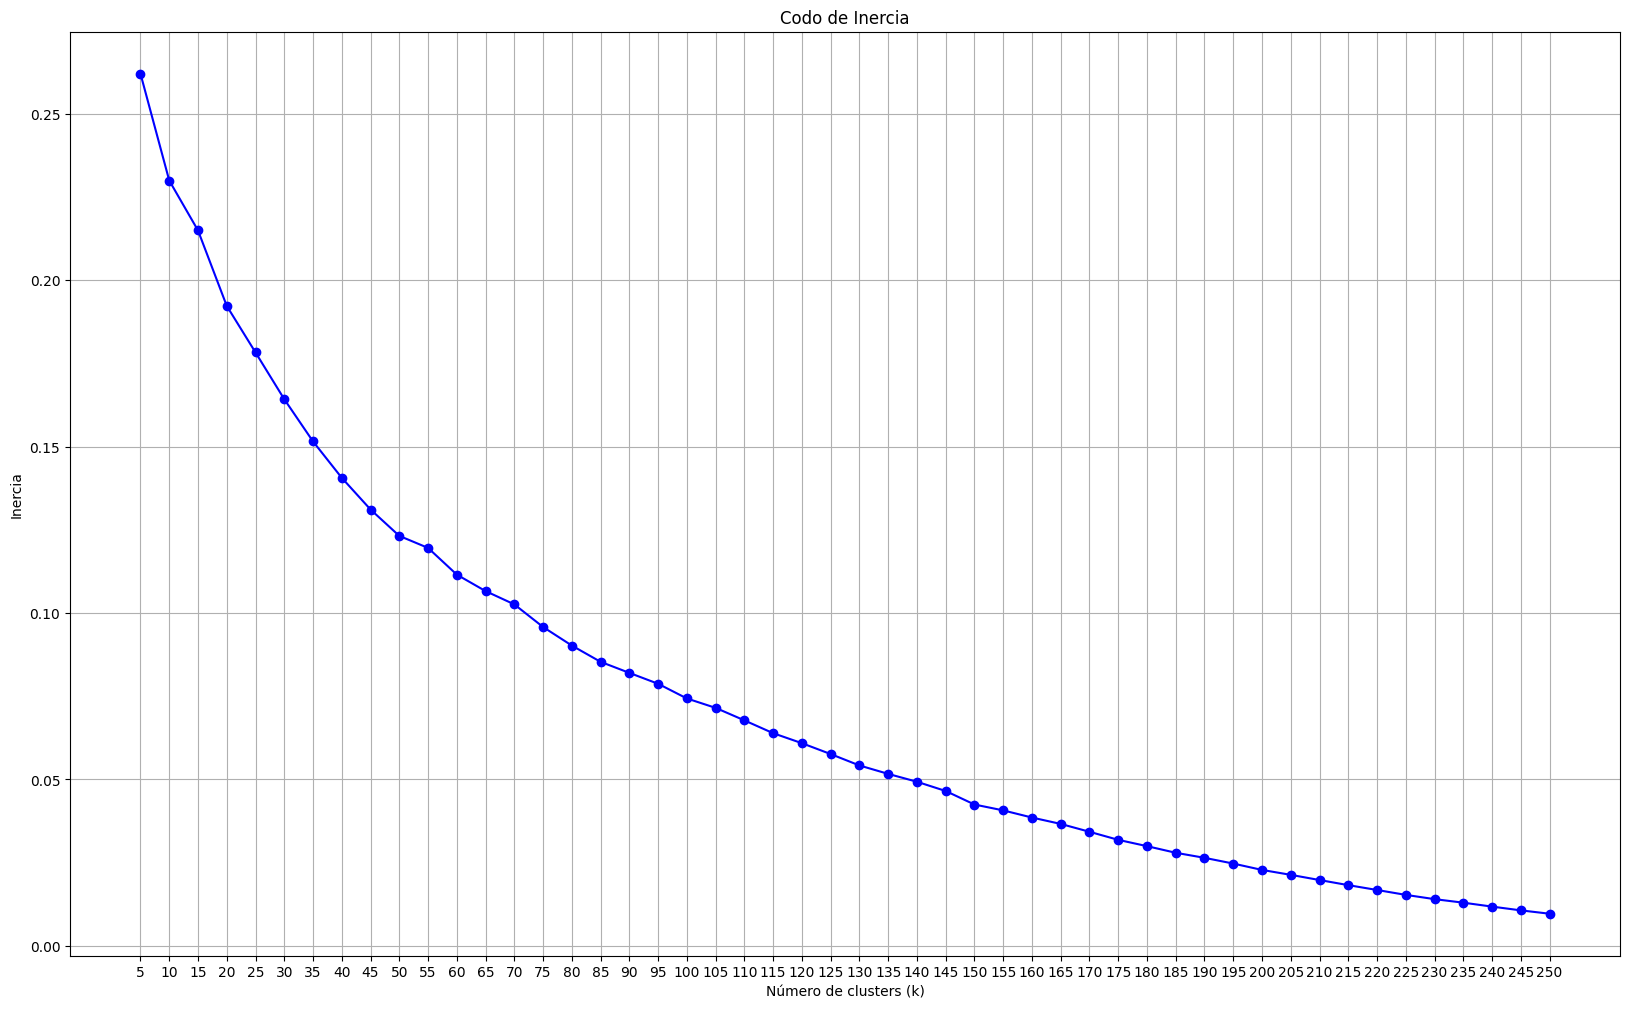

In [17]:
# Calcular la inercia para diferentes valores de k
inertia_values = []
k_range = range(5, 251, 5)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia_values.append(kmeans.inertia_)

# Plot del codo de Inercia
plt.figure(figsize=(20, 12))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Codo de Inercia')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [19]:
# Asignar el mejor valor de k obtenido con el método del score de silueta
best_k = 150

# Construir y entrenar el modelo K-Means con el mejor valor de k
best_model = KMeans(n_clusters=best_k, random_state=42)
best_model.fit(X_train_pca)


KMeans(n_clusters=150, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

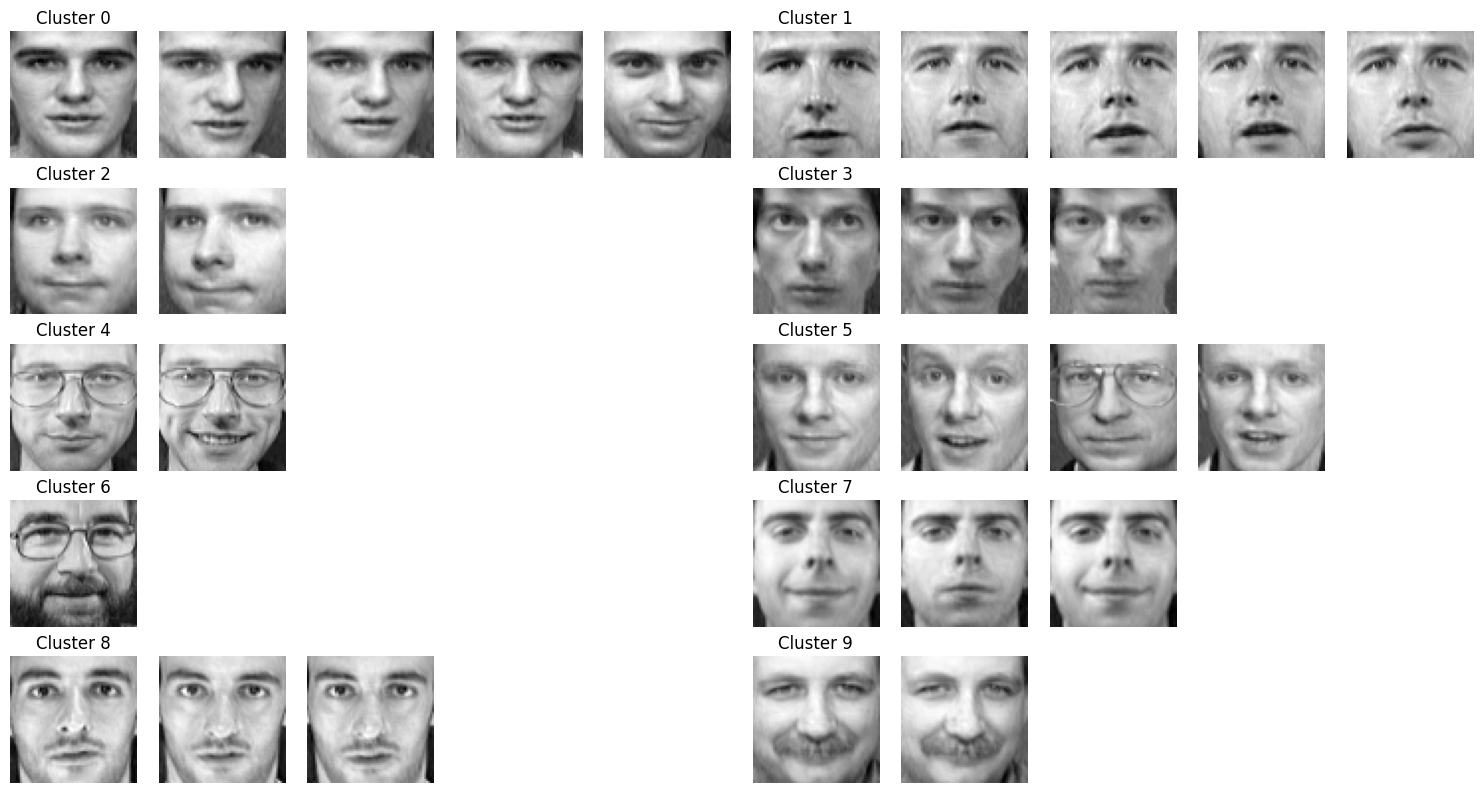

In [20]:
# Función para invertir la transformación PCA
def inverse_pca(pca_model, X_pca):
    return pca_model.inverse_transform(X_pca)

# Seleccionar aleatoriamente una muestra de imágenes de cada clúster
def select_cluster_samples(labels, cluster_num, num_samples=5):
    cluster_indices = np.where(labels == cluster_num)[0]
    selected_indices = np.random.choice(cluster_indices, size=min(num_samples, len(cluster_indices)), replace=False)
    return selected_indices

# Invertir la transformación PCA para obtener las características originales
X_train_inverse = inverse_pca(pca, X_train_pca)

# Visualizar caras asignadas a los 10 primeros clústeres
plt.figure(figsize=(15, 8))
for i in range(10):
    cluster_samples = select_cluster_samples(best_model.labels_, i)
    for j, idx in enumerate(cluster_samples):
        plt.subplot(5, 10, i * 5 + j + 1)
        plt.imshow(X_train_inverse[idx].reshape(64, 64), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f'Cluster {i}')
plt.tight_layout()
plt.show()


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entrenar un clasificador RandomForest
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = clf.predict(X_val)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_val, y_pred)
print("Precisión del clasificador RandomForest en el conjunto de validación:", accuracy)


Precisión del clasificador RandomForest en el conjunto de validación: 0.925


Una precisión del 92.5% en el conjunto de validación indica que el clasificador RandomForest está realizando muy bien (¿ademasiado? las predicciones en este conjunto de datos. Esto sugiere que el modelo puede generalizar bien a datos no vistos, lo cual es una señal positiva de que el modelo está aprendiendo patrones relevantes en las imágenes de caras y puede reconocer a qué persona está representada en cada imagen con alta precisión.

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [22]:
# Aplicar transformación a todos los datasets
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

# Entrenar un clasificador RandomForest en el conjunto reducido
clf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

# Predecir en el conjunto de validación
y_pred_reduced = clf_reduced.predict(X_val_reduced)

# Calcular la precisión del clasificador
accuracy_reduced = accuracy_score(y_val, y_pred_reduced)
print("Precisión del clasificador RandomForest en el conjunto de validación con reducción de dimensionalidad:", accuracy_reduced)


Precisión del clasificador RandomForest en el conjunto de validación con reducción de dimensionalidad: 0.775


Esta precisión es ligeramente más baja que la obtenida anteriormente sin la reducción de dimensionalidad. Esto puede deberse a que la información perdida durante la reducción de dimensionalidad afecta la capacidad del modelo para distinguir entre las clases en el conjunto de validación. Sin embargo, aún así, la precisión es bastante buena, lo que sugiere que la reducción de dimensionalidad con K-Means puede ser útil en ciertas aplicaciones donde se desea reducir la complejidad del modelo o mejorar la eficiencia computacional.

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [24]:
best_accuracy = 0
best_k = 0

for k in range(5, 151, 5):
    # Construir y entrenar el modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    
    # Obtener las distancias a los centroides como características
    X_train_distances = kmeans.transform(X_train_pca)
    X_val_distances = kmeans.transform(X_valid_pca)
    
    # Entrenar un clasificador RandomForest
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_distances, y_train)
    
    # Evaluar el clasificador en el conjunto de validación
    accuracy = accuracy_score(y_val, clf.predict(X_val_distances))
    
    # Actualizar el mejor rendimiento y el mejor k
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("El mejor número de clusters k:", best_k)
print("El mejor rendimiento (Accuracy) alcanzado:", best_accuracy)


El mejor número de clusters k: 40
El mejor rendimiento (Accuracy) alcanzado: 0.825


Es interesante observar que la elección del número de clusters en el algoritmo KMeans puede tener un impacto significativo en el rendimiento del clasificador RandomForest. En este caso, hemos encontrado que un número de clusters de 40 proporciona el mejor rendimiento en términos de precisión (accuracy) en el conjunto de validación.

Este resultado resalta la importancia de explorar diferentes configuraciones de hiperparámetros y técnicas de preprocesamiento de datos para optimizar el rendimiento de los modelos de aprendizaje automático. Además, muestra cómo las técnicas de reducción de dimensionalidad como KMeans pueden utilizarse de manera efectiva para mejorar la representación de los datos y, por ende, el rendimiento de los clasificadores.